In [1]:
# Import all necessary 
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Input

In [2]:
# A. Get the data
# Load the fashion_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Prepare the dictionaries
unsupervised_phuong = {
    'images': train_images[:60000]
}

supervised_phuong = {
    'images': test_images,
    'labels': test_labels
}

# Check the sizes of the datasets stored in the dictionaries
print(unsupervised_phuong['images'].shape)
print(supervised_phuong['images'].shape)
print(supervised_phuong['labels'].shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [3]:
# B. Data Pre-preprocessing
# Normalize the pixel values
unsupervised_phuong['images'] = unsupervised_phuong['images'].astype('float32') / 255
supervised_phuong['images'] = supervised_phuong['images'].astype('float32') / 255

# One-hot encode the labels
supervised_phuong['labels'] = tf.keras.utils.to_categorical(supervised_phuong['labels'], num_classes=10)

# Display the shapes of the modified datasets
print('Unsupervised_phuong[\'images\'].shape:', unsupervised_phuong['images'].shape)
print('Supervised_phuong[\'images\'].shape:', supervised_phuong['images'].shape)
print('Supervised_phuong[\'labels\'].shape:', supervised_phuong['labels'].shape)

Unsupervised_phuong['images'].shape: (60000, 28, 28)
Supervised_phuong['images'].shape: (10000, 28, 28)
Supervised_phuong['labels'].shape: (10000, 10)


In [4]:
# C. Data Preparation (Training, Validation, Testing)
# 1. Split the unsupervised dataset
# Flatten the images for compatibility with scikit-learn models
unsupervised_images_flattened = unsupervised_phuong['images'].reshape(60000, 28*28)
X_train_unsupervised, X_val_unsupervised, _, _ = train_test_split(
    unsupervised_images_flattened, 
    [None] * 60000,  # Dummy labels since we don't need them
    train_size=57000, 
    test_size=3000, 
    random_state=63
)

# Store the training and validation data in dataframes
unsupervised_train_phuong = pd.DataFrame(X_train_unsupervised)
unsupervised_val_phuong = pd.DataFrame(X_val_unsupervised)


# 2. Discard 7,000 samples from the supervised dataset
# Flatten the images and split the dataset, discarding 7,000 samples
supervised_images_flattened = supervised_phuong['images'].reshape(-1, 28*28)
_, X_keep_supervised, _, y_keep_supervised = train_test_split(
    supervised_images_flattened, 
    supervised_phuong['labels'], 
    test_size=(10000-7000)/10000,  # Keeping 3,000 samples
    random_state=63
)

# Update supervised_phuong dictionary to only keep the samples we didn't discard
supervised_phuong['images'] = X_keep_supervised
supervised_phuong['labels'] = y_keep_supervised

# Print the shapes to confirm the sizes
print('unsupervised_train_phuong shape:', unsupervised_train_phuong.shape)
print('unsupervised_val_phuong shape:', unsupervised_val_phuong.shape)
print('supervised_phuong[\'images\'] shape:', supervised_phuong['images'].shape)
print('supervised_phuong[\'labels\'] shape:', supervised_phuong['labels'].shape)


# 3. Split the remaining supervised dataset into training, validation, and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    supervised_phuong['images'], 
    supervised_phuong['labels'], 
    test_size=600,  # 600 for testing
    random_state=63
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, 
    y_train_val, 
    test_size=600,  # 600 out of 2400 (25%) for validation
    random_state=63
)

# Store the datasets in dataframes
x_train_phuong = pd.DataFrame(X_train)
x_val_phuong = pd.DataFrame(X_val)
x_test_phuong = pd.DataFrame(X_test)

# Training labels are already in the correct format, so just assign them
y_train_phuong = y_train
y_val_phuong = y_val
y_test_phuong = y_test


# 4. Print the shapes to confirm the sizes
print('unsupervised_train_phuong shape:', unsupervised_train_phuong.shape)
print('unsupervised_val_phuong shape:', unsupervised_val_phuong.shape)
print('x_train_phuong shape:', x_train_phuong.shape)
print('x_val_phuong shape:', x_val_phuong.shape)
print('x_test_phuong shape:', x_test_phuong.shape)
print('y_train_phuong shape:', y_train_phuong.shape)
print('y_val_phuong shape:', y_val_phuong.shape)
print('y_test_phuong shape:', y_test_phuong.shape)

unsupervised_train_phuong shape: (57000, 784)
unsupervised_val_phuong shape: (3000, 784)
supervised_phuong['images'] shape: (3000, 784)
supervised_phuong['labels'] shape: (3000, 10)
unsupervised_train_phuong shape: (57000, 784)
unsupervised_val_phuong shape: (3000, 784)
x_train_phuong shape: (1800, 784)
x_val_phuong shape: (600, 784)
x_test_phuong shape: (600, 784)
y_train_phuong shape: (1800, 10)
y_val_phuong shape: (600, 10)
y_test_phuong shape: (600, 10)


In [5]:
# D. Build, Train, and Validate a baseline CNN Model
# Define the CNN model
cnn_v1_model_phuong = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', strides=2),
    layers.Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same', strides=2),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# 2. Compile the model
cnn_v1_model_phuong.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 3. Display a summary of the model
cnn_v1_model_phuong.summary()
# Generate the plot
plot_model(cnn_v1_model_phuong, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

# Ensure the input data is reshaped to include the channel dimension (1, since images are grayscale)
x_train_reshaped = x_train_phuong.values.reshape(-1, 28, 28, 1)
x_val_reshaped = x_val_phuong.values.reshape(-1, 28, 28, 1)

# Train the model
cnn_v1_history_phuong = cnn_v1_model_phuong.fit(
    x_train_reshaped, y_train_phuong,
    validation_data=(x_val_reshaped, y_val_phuong),
    epochs=10,
    batch_size=256
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 100)               39300     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8/8 [==

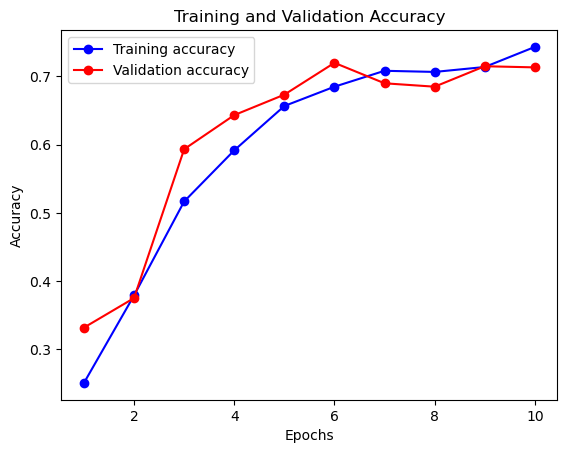

19/19 [==============================] - 0s 972us/step - loss: 0.6896 - accuracy: 0.7600
Test accuracy: 0.7599999904632568
19/19 [==============================] - 0s 861us/step


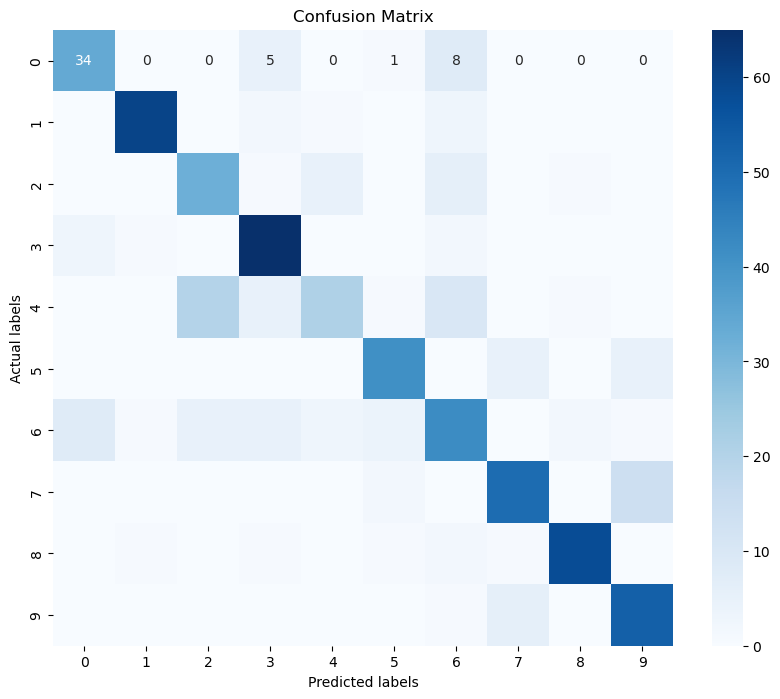

In [6]:
# E. Test and analyze the baseline model
# 1. Plot Training vs Validation Accuracy
acc = cnn_v1_history_phuong.history['accuracy']
val_acc = cnn_v1_history_phuong.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. Evaluate the Model on Test Dataset
# Ensure the test data is reshaped to include the channel dimension
x_test_reshaped = x_test_phuong.values.reshape(-1, 28, 28, 1)

# Evaluate the model
test_loss, test_accuracy = cnn_v1_model_phuong.evaluate(x_test_reshaped, y_test_phuong)
print(f'Test accuracy: {test_accuracy}')


# 3. Create Predictions on the Test Dataset
cnn_predictions_phuong = cnn_v1_model_phuong.predict(x_test_reshaped)


# 4. Plot the Confusion Matrix
# Convert predictions and labels back to class indices
y_pred_classes = np.argmax(cnn_predictions_phuong, axis=1)
y_true_classes = np.argmax(y_test_phuong, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

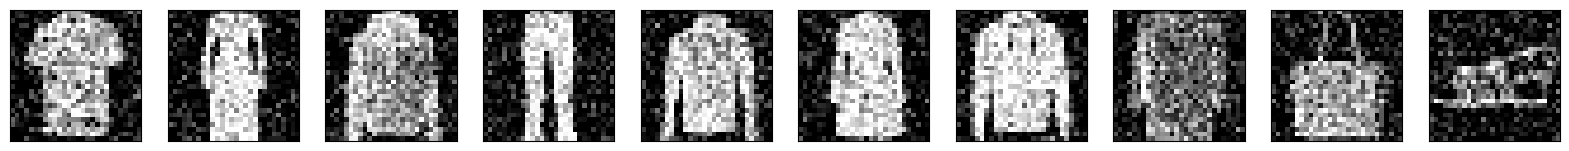

In [7]:
# F. Add random noise to unsupervised dataset
# 1. Add Random Noise
noise_factor = 0.2
random_seed = 63

# Convert pandas DataFrames to numpy arrays
unsupervised_train_phuong_np = unsupervised_train_phuong.values.reshape(-1, 28, 28, 1)
unsupervised_val_phuong_np = unsupervised_val_phuong.values.reshape(-1, 28, 28, 1)

# Add random noise to the numpy arrays
x_train_noisy_phuong_np = unsupervised_train_phuong_np + noise_factor * tf.random.normal(shape=unsupervised_train_phuong_np.shape, seed=random_seed).numpy()
x_val_noisy_phuong_np = unsupervised_val_phuong_np + noise_factor * tf.random.normal(shape=unsupervised_val_phuong_np.shape, seed=random_seed).numpy()

# Clip the values to ensure they are between 0 and 1
x_train_noisy_phuong_np = np.clip(x_train_noisy_phuong_np, 0., 1.)
x_val_noisy_phuong_np = np.clip(x_val_noisy_phuong_np, 0., 1.)

# Convert numpy arrays back to DataFrames
x_train_noisy_phuong = pd.DataFrame(x_train_noisy_phuong_np.reshape(-1, 28*28))
x_val_noisy_phuong = pd.DataFrame(x_val_noisy_phuong_np.reshape(-1, 28*28))


# 2. Clip Values
x_train_noisy_phuong = tf.clip_by_value(x_train_noisy_phuong, clip_value_min=0., clip_value_max=1.)
x_val_noisy_phuong = tf.clip_by_value(x_val_noisy_phuong, clip_value_min=0., clip_value_max=1.)


# 3. Plot the Noisy Images
# Convert it to a numpy array for plotting
x_val_noisy_phuong_np = x_val_noisy_phuong.numpy()
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_val_noisy_phuong_np[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Model: "autoencoder_phuong"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)  

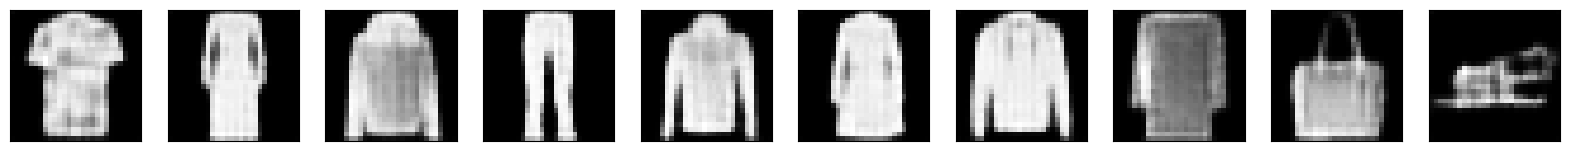

In [8]:
# G. Build and pretrain Autoencoder
# 1. Use TensorFlow's Model()  to build an autoencoder mode
# Define the input layer
inputs_phuong = Input(shape=(28, 28, 1))

# Encoder section
e_phuong = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(inputs_phuong)
e_phuong = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(e_phuong)

# Decoder section
d_phuong = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2)(e_phuong)
d_phuong = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(d_phuong)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d_phuong)

# Define the autoencoder model
autoencoder_phuong = tf.keras.Model(inputs_phuong, decoded, name="autoencoder_phuong")


# 2. Compile the Model
autoencoder_phuong.compile(optimizer='adam', loss='mean_squared_error')


# 3. Display the Model Summary
autoencoder_phuong.summary()
plot_model(autoencoder_phuong, to_file='autoencoder_phuong.png', show_shapes=True, show_layer_names=True)


# 4. Train and Validate the Autoencoder
# Reshape the data to (28, 28, 1)
x_train_noisy_phuong_np = x_train_noisy_phuong_np.reshape(-1, 28, 28, 1)
x_val_noisy_phuong_np = x_val_noisy_phuong_np.reshape(-1, 28, 28, 1)
unsupervised_train_phuong_np = unsupervised_train_phuong_np.reshape(-1, 28, 28, 1)
unsupervised_val_phuong_np = unsupervised_val_phuong_np.reshape(-1, 28, 28, 1)

# Training the autoencoder
history = autoencoder_phuong.fit(
    x_train_noisy_phuong_np,  # Reshaped noisy images
    unsupervised_train_phuong_np,  # Reshaped original images
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val_noisy_phuong_np, unsupervised_val_phuong_np)
)


# 5. Create Predictions
autoencoder_predictions_phuong = autoencoder_phuong.predict(unsupervised_val_phuong_np)


# 6. Display the Predicted Images
# Plot the first 10 predicted images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(autoencoder_predictions_phuong[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [9]:
# H. Build and perform transfer learning on a CNN with the Autoencoder
# 1. Build the CNN Model with Transferred Encoder Layers
encoder_input = autoencoder_phuong.input
encoder_output = autoencoder_phuong.layers[-1].output

# Flatten the output of the encoder to feed into the fully connected layer
flatten = Flatten()(encoder_output)

# Add a new fully connected layer
fc = Dense(100, activation='relu')(flatten)

# Add the output layer with 10 units for classification (assuming 10 classes)
output_layer = Dense(10, activation='softmax')(fc)

# Create the new CNN model using the input from the autoencoder and the new output layer
cnn_v2_phuong = Model(inputs=encoder_input, outputs=output_layer, name="cnn_v2_phuong")


# 2. Compile the Model
cnn_v2_phuong.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 3. Display the Model Summary
cnn_v2_phuong.summary()
plot_model(cnn_v2_phuong, to_file='cnn_v2_phuong.png', show_shapes=True, show_layer_names=True)


# 4. Train and Validate the Model
# Convert pandas DataFrames to numpy arrays and reshape
x_train_phuong_reshaped = x_train_phuong.values.reshape(-1, 28, 28, 1)
x_val_phuong_reshaped = x_val_phuong.values.reshape(-1, 28, 28, 1)

cnn_v2_history_phuong = cnn_v2_phuong.fit(
    x_train_phuong_reshaped, y_train_phuong,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val_phuong_reshaped, y_val_phuong)
)

Model: "cnn_v2_phuong"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)       

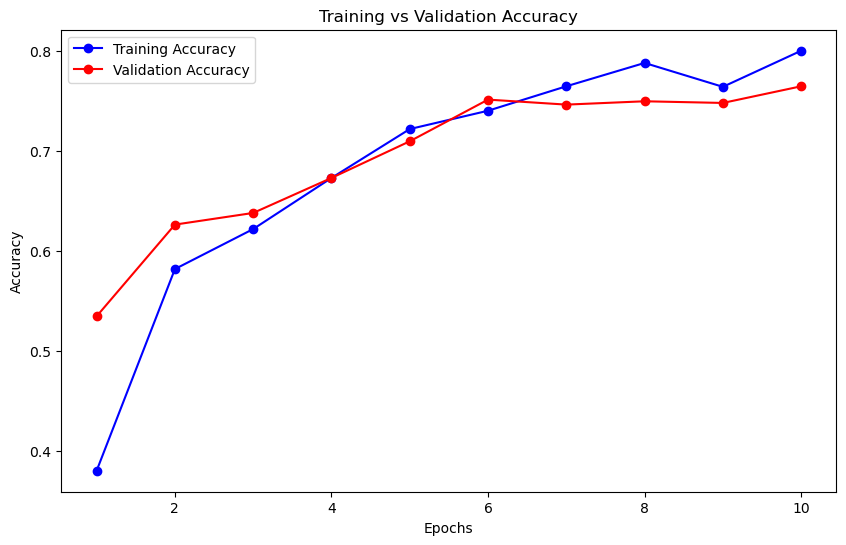

19/19 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.7917
Test Accuracy: 0.7916666865348816
19/19 [==============================] - 0s 4ms/step


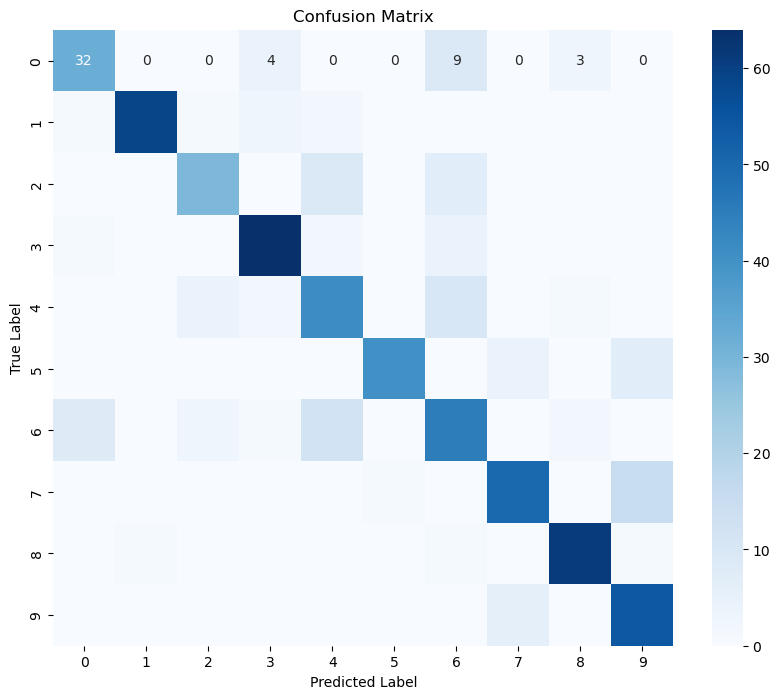

In [10]:
# I. Test and analyze the pretrained CNN model
# 1. Plot Training vs Validation Accuracy
# Extract accuracy history
training_accuracy = cnn_v2_history_phuong.history['accuracy']
validation_accuracy = cnn_v2_history_phuong.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. Evaluate the Model on the Test Dataset
# Ensure the test dataset is reshaped correctly
x_test_phuong_reshaped = x_test_phuong.values.reshape(-1, 28, 28, 1)

# Evaluate the model
test_loss, test_accuracy = cnn_v2_phuong.evaluate(x_test_phuong_reshaped, y_test_phuong)
print(f'Test Accuracy: {test_accuracy}')


# 3. Create Predictions on the Test Dataset
cnn_predictions_phuong = cnn_v2_phuong.predict(x_test_phuong_reshaped)


# 4. Display the Confusion Matrix
y_pred_classes = np.argmax(cnn_predictions_phuong, axis=1)
y_true_classes = np.argmax(y_test_phuong, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

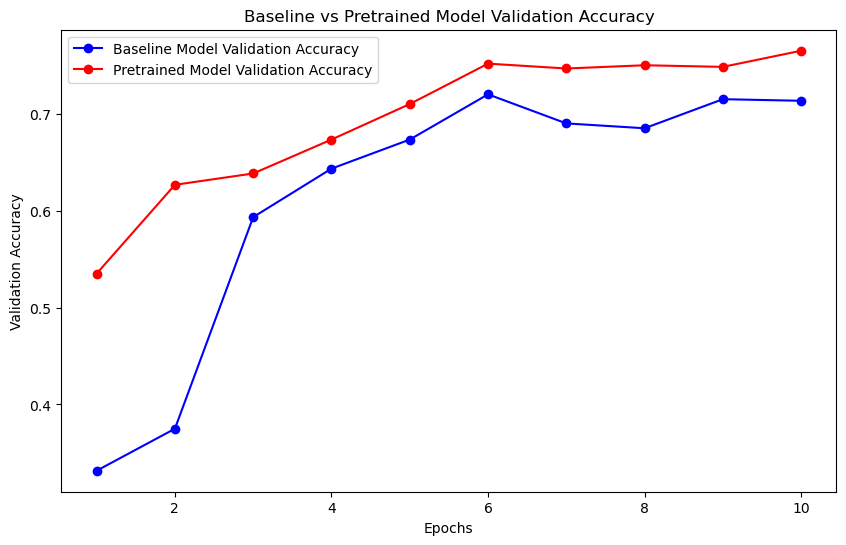

19/19 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.7917
Baseline Model Test Accuracy: 0.7599999904632568
Pretrained Model Test Accuracy: 0.7916666865348816


In [11]:
# J. Compare the performance of the baseline CNN model to the pretrained model
# Extract validation accuracy
val_acc_baseline = cnn_v1_history_phuong.history['val_accuracy']
val_acc_pretrained = cnn_v2_history_phuong.history['val_accuracy']
epochs = range(1, len(val_acc_baseline) + 1)

# Plot validation accuracy for both models
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc_baseline, 'bo-', label='Baseline Model Validation Accuracy')
plt.plot(epochs, val_acc_pretrained, 'ro-', label='Pretrained Model Validation Accuracy')
plt.title('Baseline vs Pretrained Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Evaluate Baseline Model and Pretrained Model on the Test Dataset
test_loss_baseline, test_accuracy_baseline = cnn_v1_model_phuong.evaluate(x_test_phuong_reshaped, y_test_phuong)
test_loss_pretrained, test_accuracy_pretrained = cnn_v2_phuong.evaluate(x_test_phuong_reshaped, y_test_phuong)

# Print Test Accuracies for Comparison
print(f'Baseline Model Test Accuracy: {test_accuracy_baseline}')
print(f'Pretrained Model Test Accuracy: {test_accuracy_pretrained}')